### Drawing line on Image

In [3]:
import numpy as np
import cv2

In [8]:
img = cv2.imread('../Me1.png', cv2.IMREAD_COLOR) # Include your images here.
cv2.line(img, (0,700), (925, 700), (255, 255, 255), 15) # BGR
# from (0, 700) to (925, 700), color - (255, 255, 255) - white, weight - 15 pixels
img.shape

(765, 925, 3)

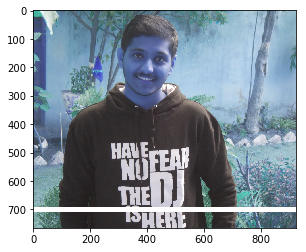

In [21]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [22]:
cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Superimposing an image over other

Using thresholding and bitwise operators.

In [4]:
# Read the images 

img1 = cv2.imread('../Me1.png') # Include your images here.
img2 = cv2.imread('../Kush.png')

In [5]:
# Shape returns the no. of rows, cols, channels 
rows, cols, channels = img2.shape

# Region of Image - You want to stick logo on
roi = img1[0:rows, 0:cols]

# convert the image to gray & store it as img2gray
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# above 220 - set it to 255, now do inverse of this - because of cv2.THRESH_BINARY_INV
ret, mask = cv2.threshold(img2gray, 220, 255, cv2.THRESH_BINARY_INV)

# use bitwise operators 
mask_inv = cv2.bitwise_not(mask) # create mask inverse

# Image 1 - background
img1_bg = cv2.bitwise_and(roi, roi, mask = mask_inv)

# Image 2 - foreground 
img2_fg = cv2.bitwise_and(img2, img2, mask = mask)

In [6]:
# Use cv2.add function to add both images
dst = cv2.add(img1_bg, img2_fg) 
img1[0:rows, 0:cols] = dst

In [7]:
# Final generated image
cv2.imshow('Result', img1)

# Show all images - 

cv2.imshow('roi', roi)
cv2.imshow('mask', mask)
cv2.imshow('mask_inv', mask_inv)
cv2.imshow('img1_bg', img1_bg)
cv2.imshow('img2_fg', img2_fg)
cv2.imshow('dst', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()